# Machine Learning (csce 633) HW 2
## Name: Guru Sarath Thangamani
## UIN: 829009551

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
train_set = np.loadtxt('hw2__question1_train.csv', delimiter = ',', dtype = int, skiprows=1)
test_set = np.loadtxt('hw2__question1_test.csv', delimiter = ',', dtype = int, skiprows=1)
headers = ["Hour", "Immobilized bus", "Broken Truck", "Vehicle excess", "Accident victim", "Running over",
          "Fire vehicles", "Occurrence involving freight", "Incident involving dangerous freight", 
          "Lack of electricity", "Fire", "Point of flooding", "Manifestations", "Defect in the network of trolleybuses",
          "Tree on the road", "Semaphore off", "Intermittent Semaphore", "Slowness in traffic (%)"]

X_train = train_set
X_train = X_train[:,0:-1]
X_train = np.hstack( ( np.ones((X_train.shape[0],1)) , X_train ) )  
y_train = train_set[:,-1]
print("X train shape: ", X_train.shape)
print("y train shape: ",y_train.shape)

X_test = test_set
X_test = X_test[:,0:-1]
X_test = np.hstack( ( np.ones((X_test.shape[0],1)) , X_test ) )  
y_test = test_set[:,-1]
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

X train shape:  (100, 18)
y train shape:  (100,)
X test shape:  (35, 18)
y test shape:  (35,)


# (i) Data Exploration

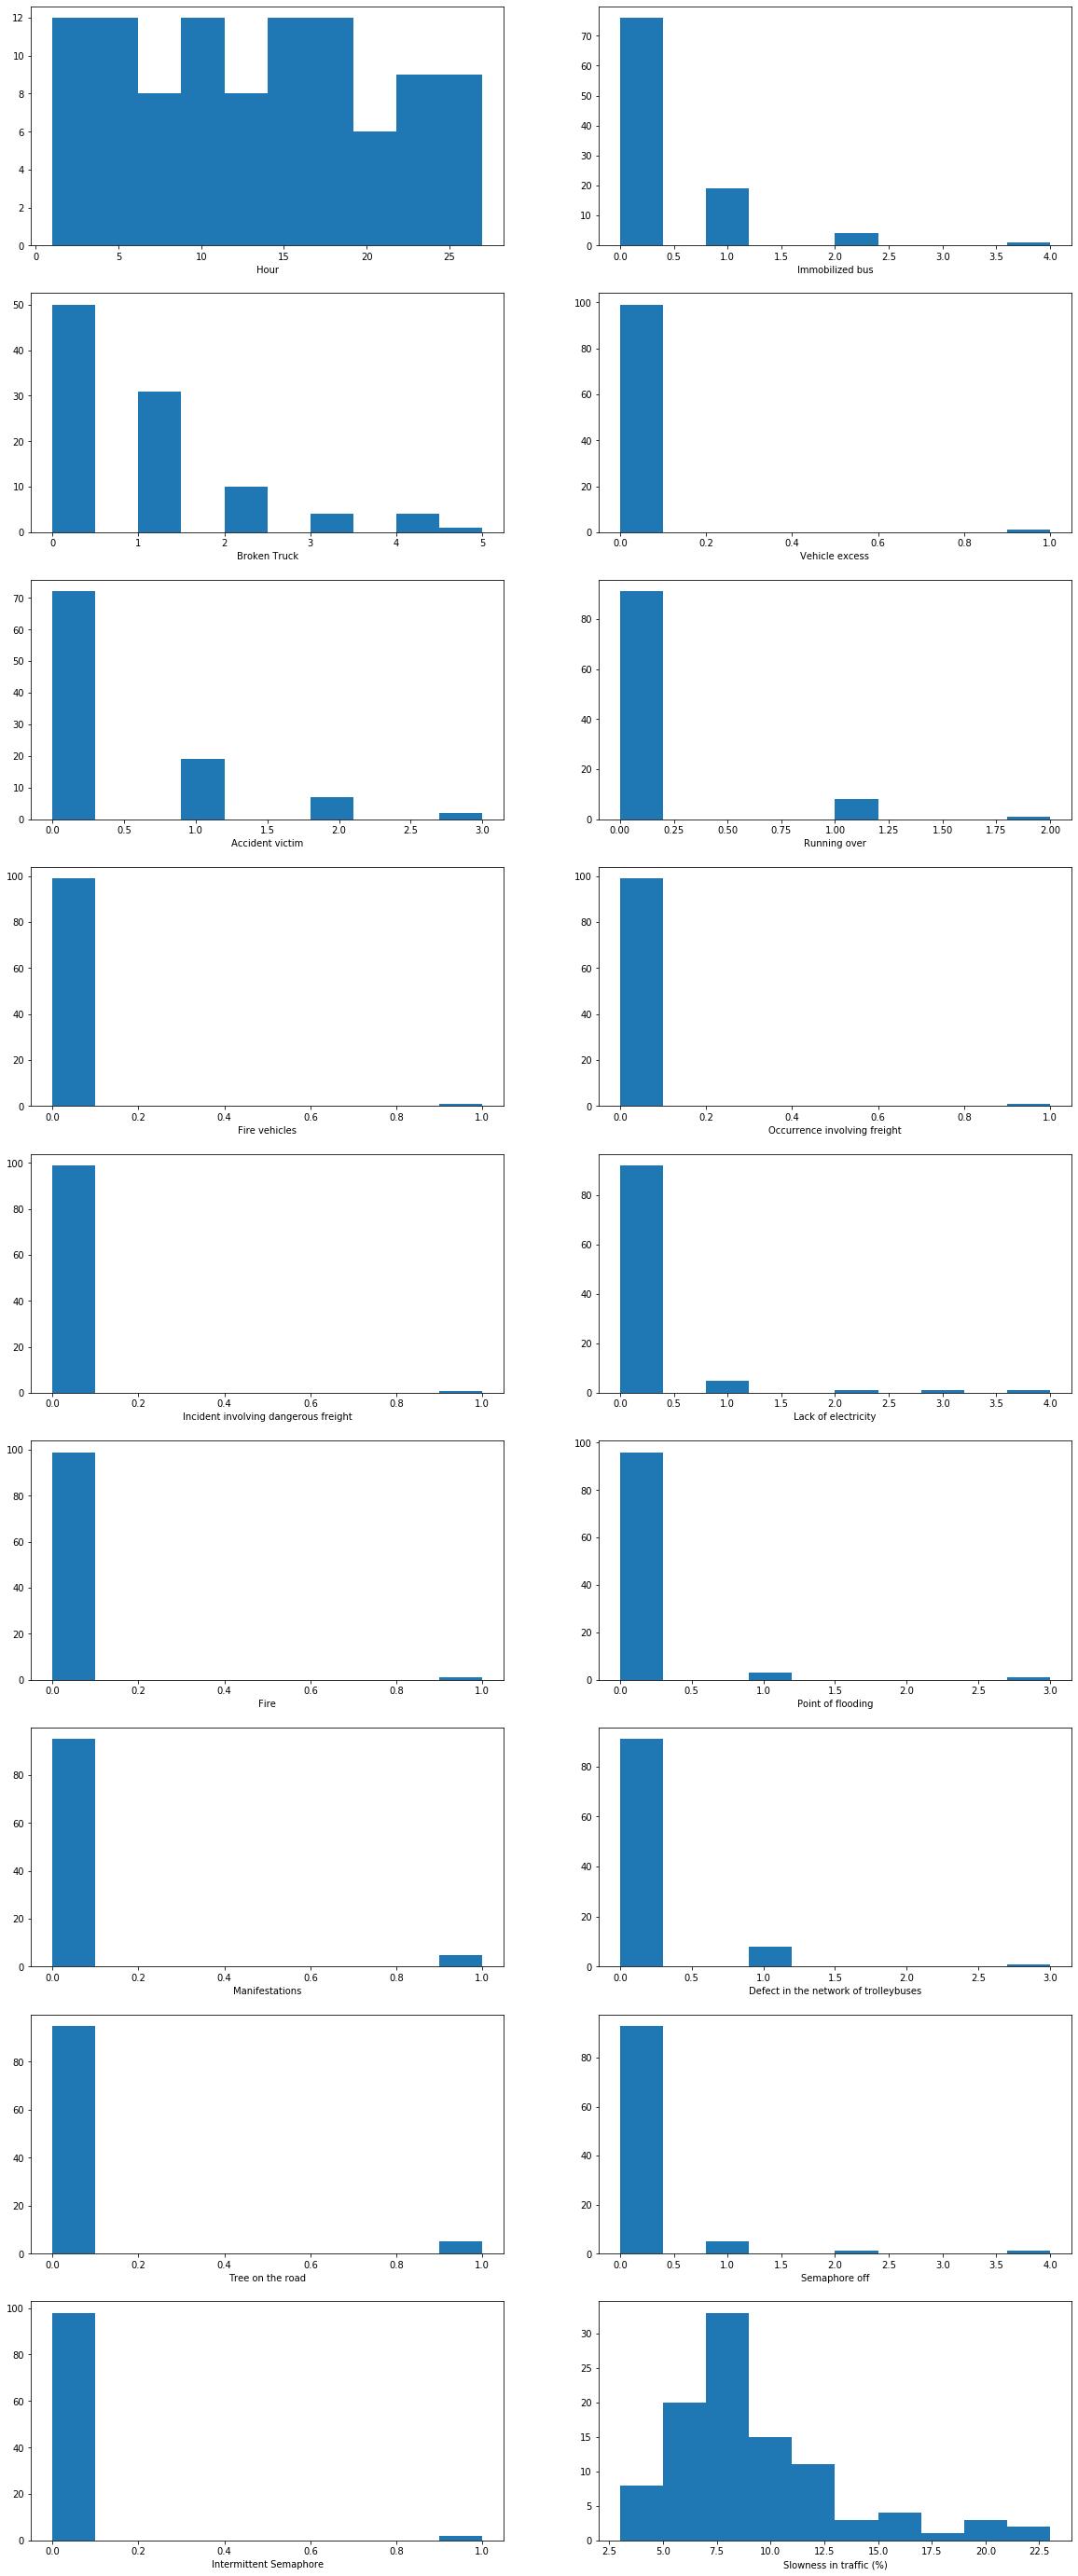

In [82]:
plt.figure(figsize=(20,50))
for i,hdr in enumerate(headers):
    plt.subplot(9,2,i+1)
    plt.xlabel(hdr)
    plt.hist(train_set[:,i])

# (ii) Data Exploration

In [83]:
for i in range(len(headers)):
    corrs,p = pearsonr(train_set[:,i], y_train)
    print(headers[i], ":  ", corrs)


Hour :   0.6707105739042725
Immobilized bus :   0.15510125658984802
Broken Truck :   0.1471936844073055
Vehicle excess :   -0.1464640400232247
Accident victim :   0.12678483696305048
Running over :   -0.012205336668602063
Fire vehicles :   0.18409716141808105
Occurrence involving freight :   0.05695823778680961
Incident involving dangerous freight :   0.03153045306055532
Lack of electricity :   0.5737326666240945
Fire :   -0.04475290111820755
Point of flooding :   0.4556179652155694
Manifestations :   -0.0557212122061783
Defect in the network of trolleybuses :   -0.16783420054885045
Tree on the road :   -0.07893838395875258
Semaphore off :   0.42866617010993074
Intermittent Semaphore :   -0.13589889585548648
Slowness in traffic (%) :   1.0


# (iii)

In [84]:
#w∗ = (XT * X)−1XT y
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T , X_train)), X_train.T), y_train)
print(w)
print('Number of parameters = ', len(w))

[ 4.88163779  0.26349179  0.44771762 -0.14543905 -2.14512958 -0.03559434
 -0.29705992  4.26438321  0.74721543  0.38048825  2.09501546 -0.37111665
  1.81826542  0.74351787 -0.56926429 -0.59828605  0.51841252 -0.80646839]
Number of parameters =  18


# (iv)

In [85]:
predictions = X_test.dot(w)
RSS = np.sum((predictions - y_test)**2)
print('RSS = ', RSS)

corrs,p = pearsonr(predictions, y_test)
print('Correlation = ', corrs)

RSS =  501.8642602243618
Correlation =  0.8197758586024668


# (v) (Bonus)

In [86]:
for i in range(1,train_set.shape[1]):
    for j in range(i,train_set.shape[1]):
        corrs2,p2 = pearsonr(X_train[:,i], X_train[:,j])
        print(headers[i] +' and '+headers[j], '= ', corrs2)

Immobilized bus and Immobilized bus =  0.9999999999999999
Immobilized bus and Broken Truck =  0.08533779550415554
Immobilized bus and Vehicle excess =  0.22391505607501
Immobilized bus and Accident victim =  -0.16250899875150263
Immobilized bus and Running over =  0.18841399536931955
Immobilized bus and Fire vehicles =  0.04222047516583155
Immobilized bus and Occurrence involving freight =  0.15613609683967897
Immobilized bus and Incident involving dangerous freight =  0.02336730701001998
Immobilized bus and Lack of electricity =  -0.0031864509559118184
Immobilized bus and Fire =  0.28388585372563585
Immobilized bus and Point of flooding =  -0.04301708790480953
Immobilized bus and Manifestations =  0.2344892677080247
Immobilized bus and Defect in the network of trolleybuses =  -0.152745115072063
Immobilized bus and Tree on the road =  -0.17500014544566003
Immobilized bus and Semaphore off =  -0.0497027755393221
Immobilized bus and Intermittent Semaphore =  0.19327301180300369
Immobiliz

Semaphore off and Slowness in traffic (%) =  -0.03277367626722312
Intermittent Semaphore and Intermittent Semaphore =  1.0
Intermittent Semaphore and Slowness in traffic (%) =  -0.03221791446125724
Slowness in traffic (%) and Slowness in traffic (%) =  1.0


# (vi)

In [14]:
threshold = np.mean( np.hstack( (y_test, y_train) ) )
print(threshold)
y_test_logistic = (y_test >= threshold).astype(int)
y_train_logistic = (y_train >= threshold).astype(int)

print(y_test_logistic)
print(y_train_logistic)

clf = LogisticRegression(C=1e100).fit(X_train, y_train_logistic)
predictions_logistic = clf.predict(X_test)
print(predictions_logistic)

Accuracy = (np.sum(predictions_logistic == y_test_logistic) / y_test_logistic.shape)*100
print('Accuracy = ', Accuracy)

9.622222222222222
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0]
[1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1]
Accuracy =  [62.85714286]


# (Vii) Bonus

In [12]:
from sklearn.model_selection import cross_val_score

for i in [100, 10, 1, 0.5, 0.1, 0.001, 0.0001, 0.00001]:
    clf = LogisticRegression(penalty='l2', C = i)
    cv_results = cross_val_score(clf, X_train, y_train_logistic, cv=5)
    print("C = ", i , "  ", cv_results, 'Mean = ',np.mean(cv_results))

C =  100    [0.8  0.65 0.85 0.95 0.65] Mean =  0.78
C =  10    [0.8  0.65 0.85 0.95 0.65] Mean =  0.78
C =  1    [0.85 0.65 0.85 0.95 0.7 ] Mean =  0.8
C =  0.5    [0.85 0.65 0.85 0.95 0.7 ] Mean =  0.8
C =  0.1    [0.85 0.65 0.9  0.85 0.7 ] Mean =  0.79
C =  0.001    [0.7 0.7 0.7 0.7 0.7] Mean =  0.7
C =  0.0001    [0.7 0.7 0.7 0.7 0.7] Mean =  0.7
C =  1e-05    [0.7 0.7 0.7 0.7 0.7] Mean =  0.7


In [13]:
clf = LogisticRegression(penalty='l2', C=0.5).fit(X_train, y_train_logistic)
predictions_logistic = clf.predict(X_test)
print(predictions_logistic)

Accuracy = (np.sum(predictions_logistic == y_test_logistic) / y_test_logistic.shape)*100
print('Accuracy = ', Accuracy)

[0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
Accuracy =  [65.71428571]
